In [1]:
#necessary libraries
import pystac
from pystac_client import Client
from shapely.geometry import Point
import leafmap

import matplotlib.pyplot as plt

### 1. Connects to the API and prints out the title property of all the available collections.

In [2]:
#Connecting the api
api_url="https://earth-search.aws.element84.com/v1"
client=Client.open(api_url)

In [3]:
#Finding the collections
collections=client.get_collections()
for collection in collections:
    #Printing out the title property of all the availabel collections.
    print(collection)

<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=naip>
<CollectionClient id=sentinel-2-l2a>
<CollectionClient id=sentinel-2-l1c>
<CollectionClient id=landsat-c2-l2>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=sentinel-1-grd>


### 2. Retrieves the number of scenes from sentinel-2-l2a collection that intersects with the given point, and are acquired between Jan 1st, 2022 and May 31st, 2022.

In [5]:
point=Point(11.232754,35.004162) #using shapely Points to determine the Point feature

#Creating the search criteria 
search1=client.search(
    collections=["sentinel-2-l2a"],
    intersects=point, 
    datetime="2022-01-01/2022-05-31")

#Printing the matched number of scenes from above criteria
print(search1.matched())

60


### 3. Plots a histogram of the percent water present in each scene across all the scenes from the step 2 query. 

In [6]:
items=search1.item_collection()
len(items)

60

In [7]:
#Creating the function to get property attributes
def item_detail(a):
    
    #Importing the libraries
    import pandas as pd
    
    #blank list to append the new values
    ids=[]
    percentage=[]
    
    #retriving the ids and s2:water_percentage
    for i in range(len(a)):
        k=round(float(items[i].properties['s2:water_percentage']),3)
        ids.append(items[i].id)
        percentage.append(k)
    
    #Creating the pandas dataframe
    detail={'id':ids,'water_percentage':percentage}
    df=pd.DataFrame(detail)
    
    #showing the all matched values
    return df.head(len(a))


Text(0.5, 1.0, 'The percent water present in each scene')

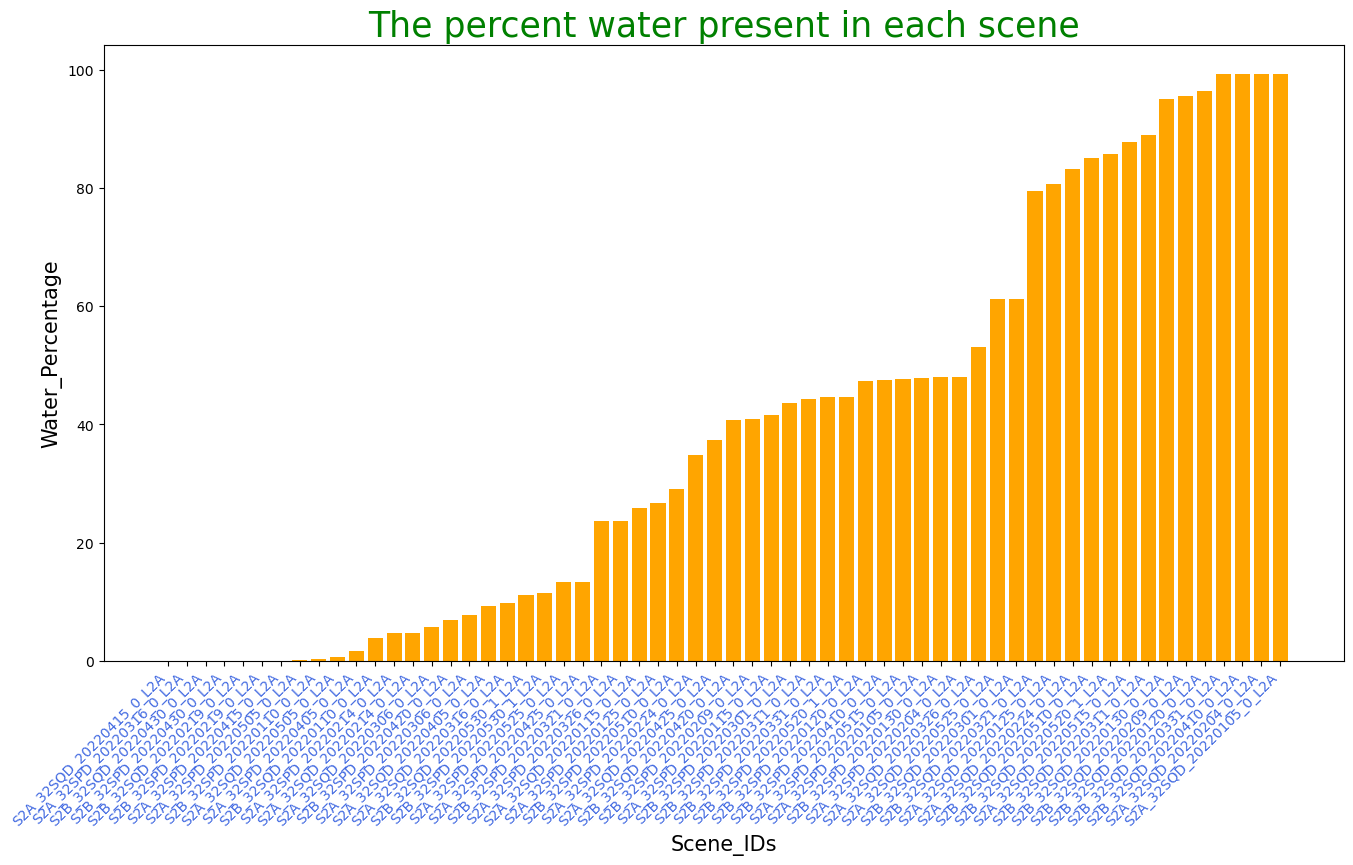

In [8]:
#Plotting the Histogram of the percent water present in each scene across all the scenes from the step 2 query.  
#creating the variable with the value retrived using the above function. 
df=item_detail(items)

#Sorting the values
df=df.sort_values(by='water_percentage')

#Creating the figure
plt.figure(figsize=(16,8))
plt.bar(df['id'],df['water_percentage'], color='orange')
plt.xlabel('Scene_IDs', fontsize=15)
plt.ylabel('Water_Percentage', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=10, color='royalblue')
plt.title('The percent water present in each scene', fontsize=25, color='green')


### 4. Returns the id of all scenes that follow the query parameters identified in step 2, and have less than 5% pixels covered by cloud and more than 50% of the pixels classified as water.

In [12]:
search2=client.search(
    collections=["sentinel-2-l2a"],
    intersects=dict(type="Point",coordinates=(35.004162, 11.232754)),
    datetime="2022-01-01/2022-05-31",
    query=["eo:cloud_cover<5","s2:water_percentage>50"]
    )

#Printing the matched search items
print(search2.matched())

0


In [14]:
#Checking the dataframe using the function
items2=search2.item_collection()
df2=item_detail(items2)
df2.head()

,id,water_percentage
